In [47]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
digits = datasets.load_digits()

X = digits.images
y = digits.target

In [89]:
n_samples = len(X)
X_flat = X.reshape((n_samples, -1))  

X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf')  
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

In [93]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.06%


In [95]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [97]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 32  0  1]
 [ 0  0  0  0  1  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  0  1 38]]


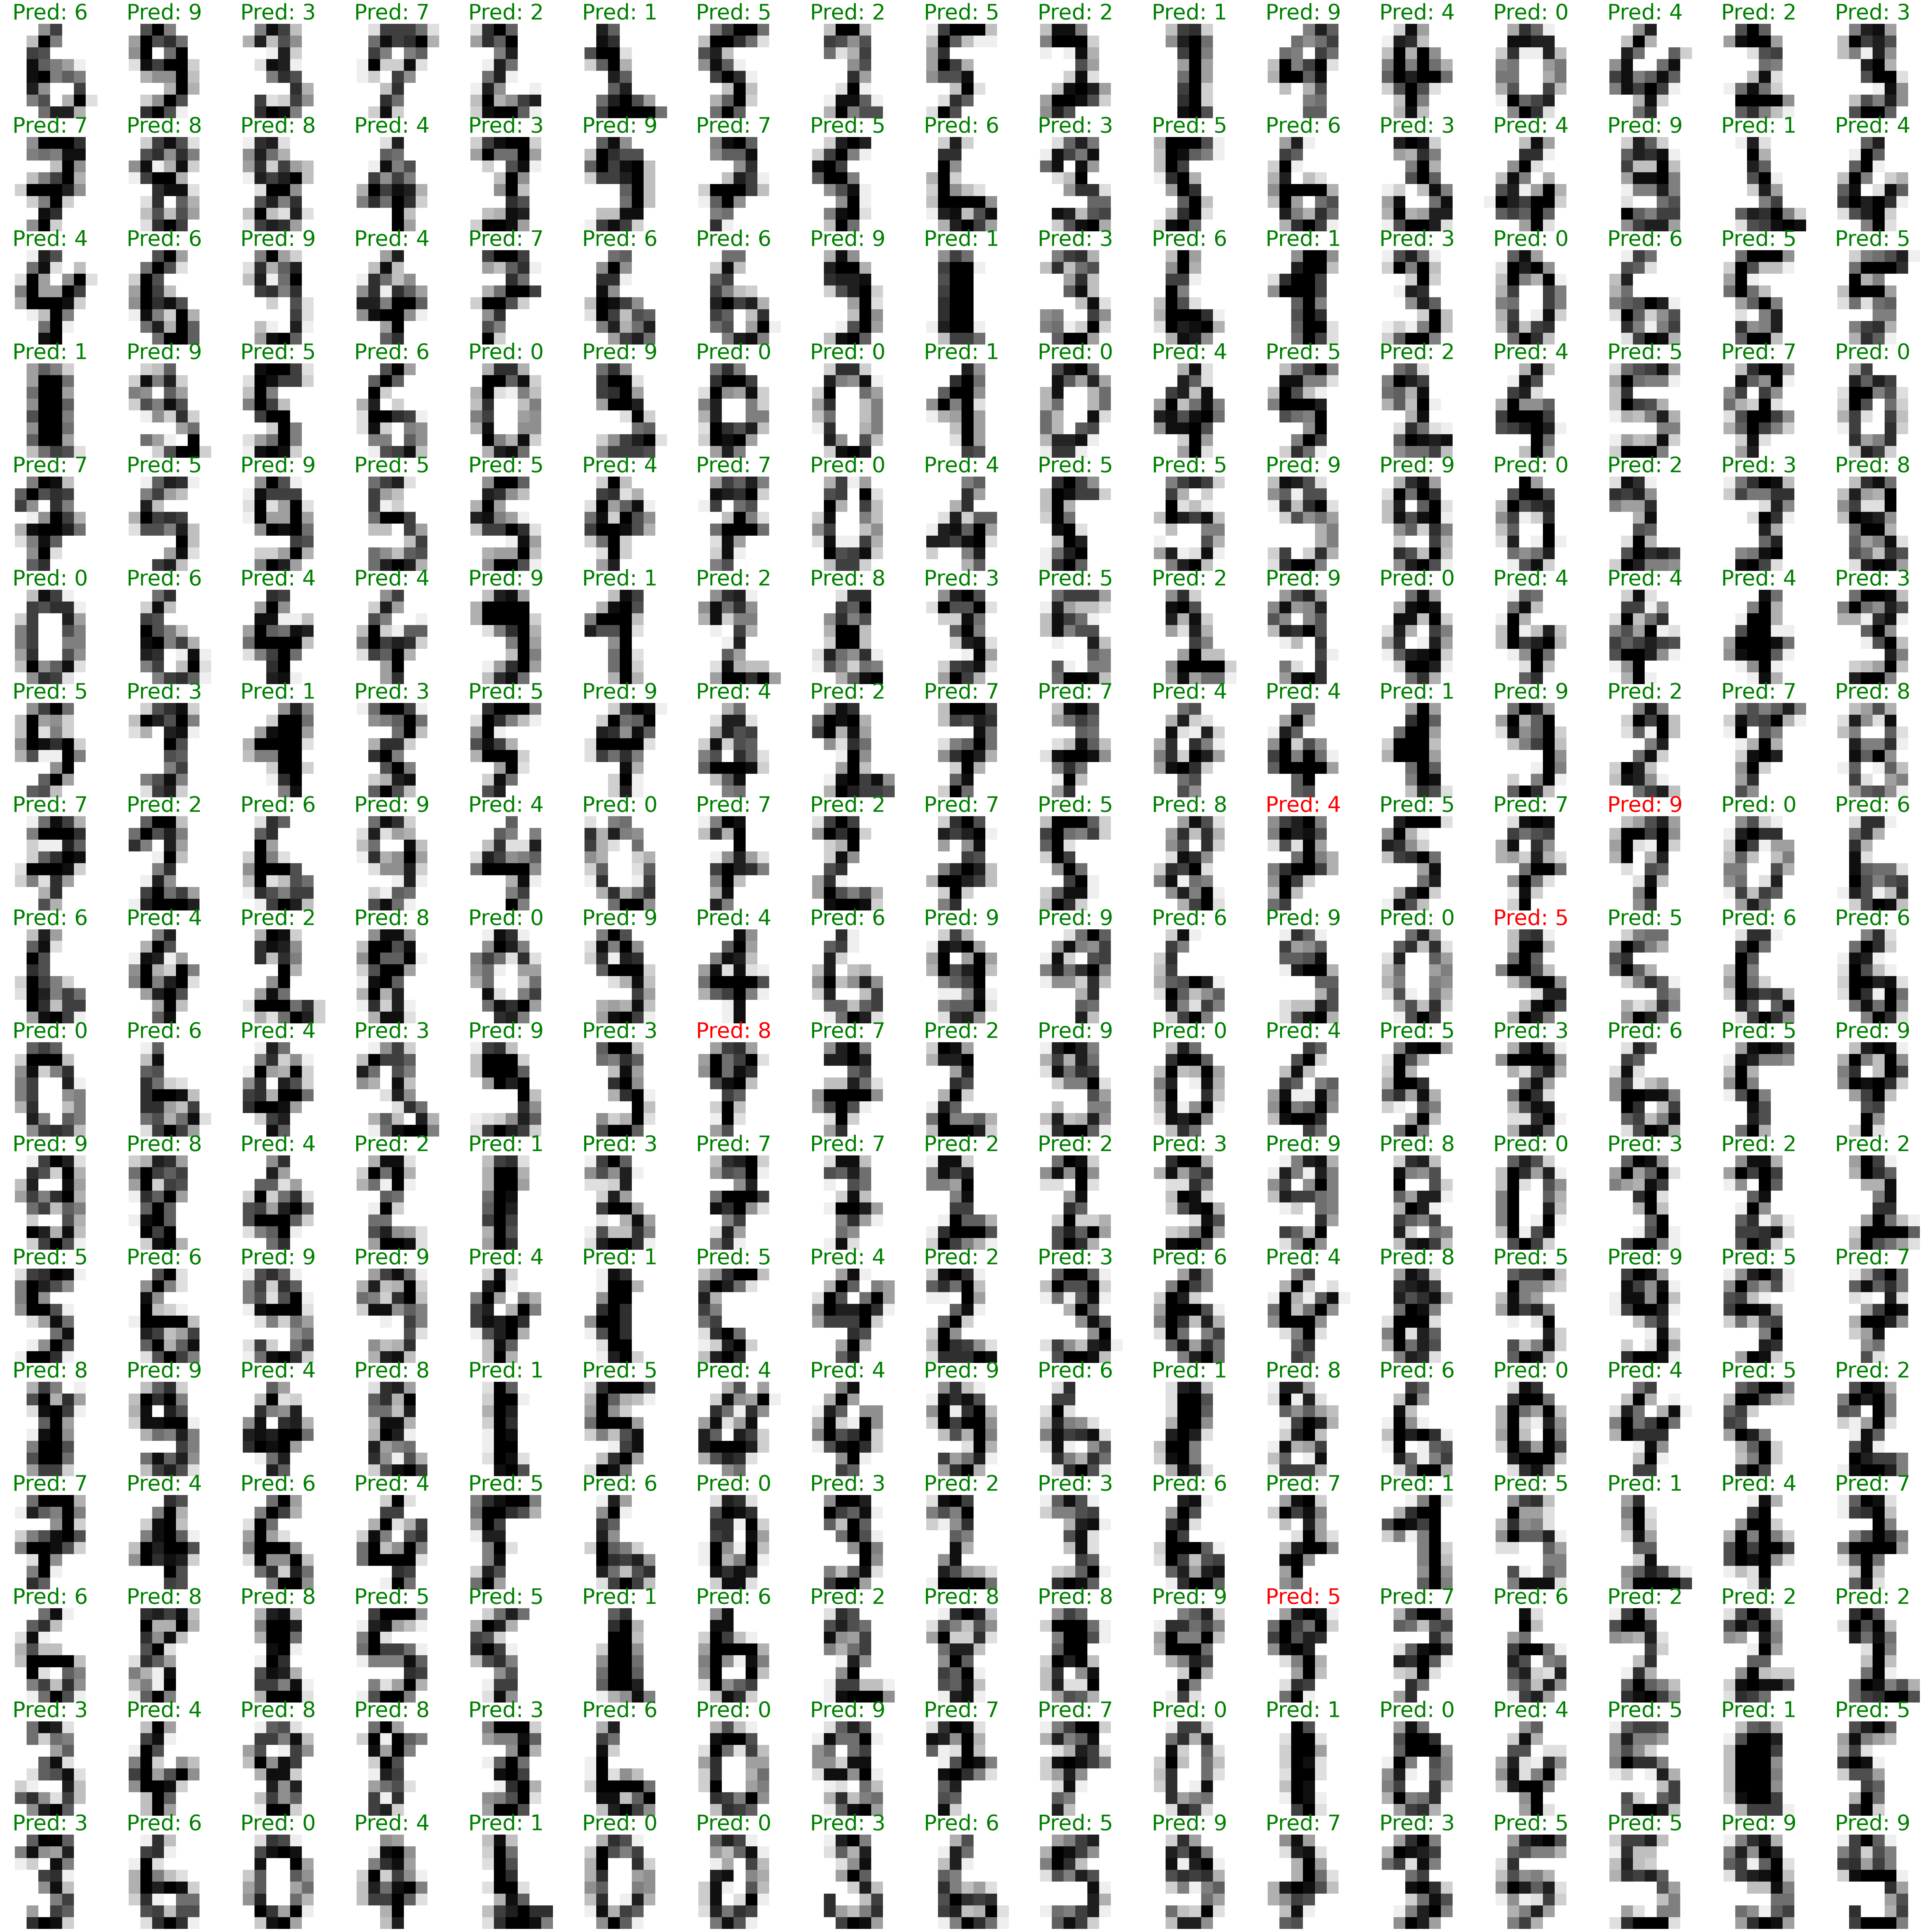

In [117]:
fig, axes = plt.subplots(17, 17, figsize=(80, 80))
images_and_predictions = list(zip(X_test, y_pred))

for i, (ax, (image, prediction)) in enumerate(zip(axes.ravel(), images_and_predictions)):
    ax.set_axis_off()
    image = image.reshape(8, 8)  # Reshape the flat image to 8x8
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    
    # Get the true label for the current image using the index 'i'
    true_label = y_test[i]
    
    # Set the color based on whether the prediction is correct
    color_title = 'green' if prediction == true_label else 'red'
    
    # Set the title with the prediction, colored accordingly
    ax.set_title(f'Pred: {prediction}', color=color_title, fontsize=50)

plt.show()